In [1]:
import pandas as pd
import nlplot
import pandas as pd
import plotly
from plotly.subplots import make_subplots
from plotly.offline import iplot
import matplotlib.pyplot as plt

import word_wakati as wkt

In [2]:
df = pd.read_csv('Dataset.csv')
df.head()

年度 学科／研究科   研究室     学籍番号    賞    氏名   要旨  \
0  H17  情報科学科    相研  02JK001  NaN  青木雄司  NaN   
1  H17  情報科学科   松永研  02JK002  NaN  青柳茂樹  NaN   
2  H17  情報科学科   宮崎研  02JK003  NaN  芦刈綾子  NaN   
3  H17  情報科学科    成研  02JK005  NaN  足達祐治  NaN   
4  H17  情報科学科  石田健研  02JK006  NaN  安部弘治  NaN   

                                          題目  
0                       WEBページにおけるユーザビリティの追及  
1  安全運転管理教育システム(ASSIST)における複数カメラ使用での交通事故防止対策  
2     電子透かしの体制に関する検討 -加重平均フィルタ・メディアンフィルタの場合-  
3                      対面教育を支援するためのウェブ助言システム  
4            衛星通信検討のための気象データの解析-2002年のデータ解析-

In [3]:
df["研究室"].unique()

array(['相研', '松永研', '宮崎研', '成研', '石田健研', '中野研', '仲研', '澤田研', '稲永研', '合志研',
       '米元研', '朝廣研', '牛島研', '下川研', '安部研', 'アプドゥハン研', '花野井研', '廣田研', '有田研',
       '坂本研', '松本研', '斉藤研', '一ノ瀬研', '古井研', '田中・安武研', '松永・合志研', '安武研',
       '田中研', '石田俊研', '前田研', '于研'], dtype=object)

In [4]:
# 一部の研究室が途中でできたり、存在なくなったりするため
# 初年度（H17）～昨年度まで存在する研究室に限定する
labs = ['成研', '石田健研', '仲研', '澤田研', '稲永研', '合志研',
       '米元研', '朝廣研', '下川研', '安部研', 'アプドゥハン研']

In [5]:
df["年度"].unique()

array(['H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24', 'H25',
       'H26', 'H27', 'H28', 'H29', 'H30', 'R01', 'R02', 'R03', 'R04'],
      dtype=object)

In [6]:
years= df["年度"].unique().tolist()
n_years = len(years) # 18年間
print(n_years)

18


In [56]:
%matplotlib inline

成研 H17 H25


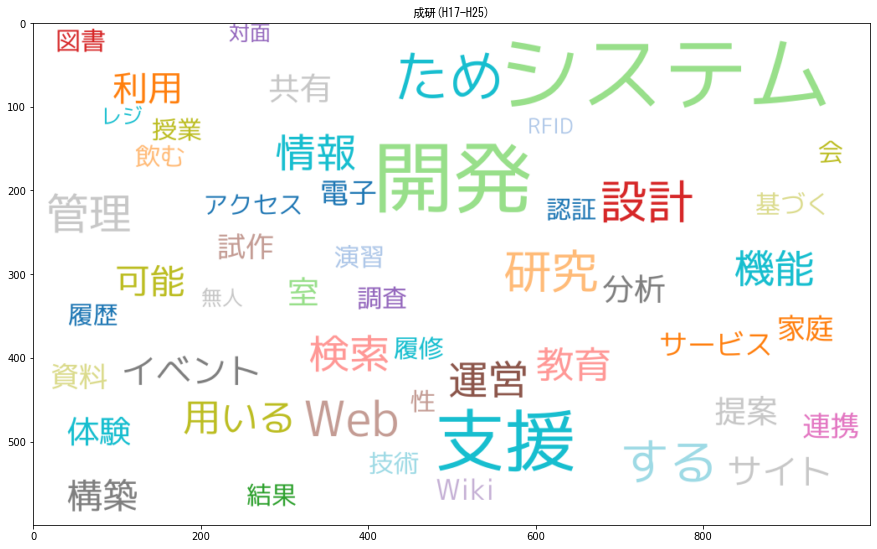

成研 H26 R04


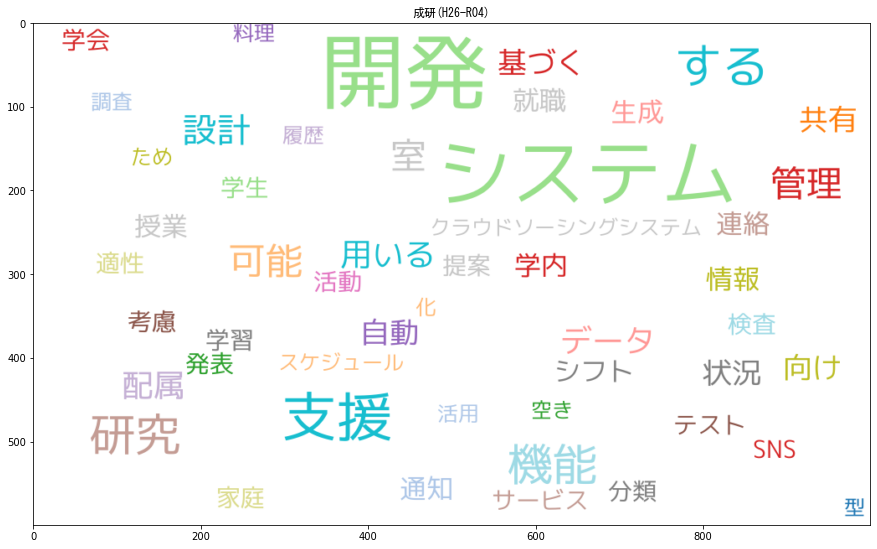

石田健研 H17 H25


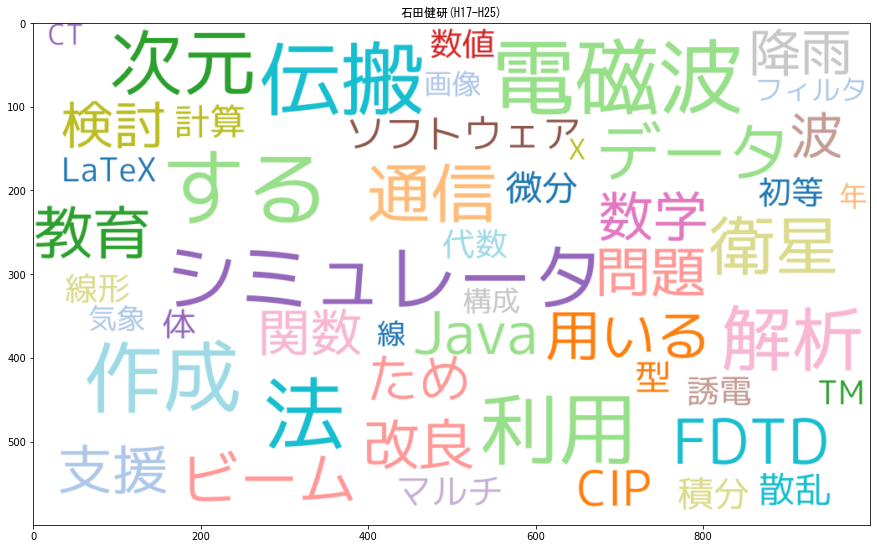

石田健研 H26 R04


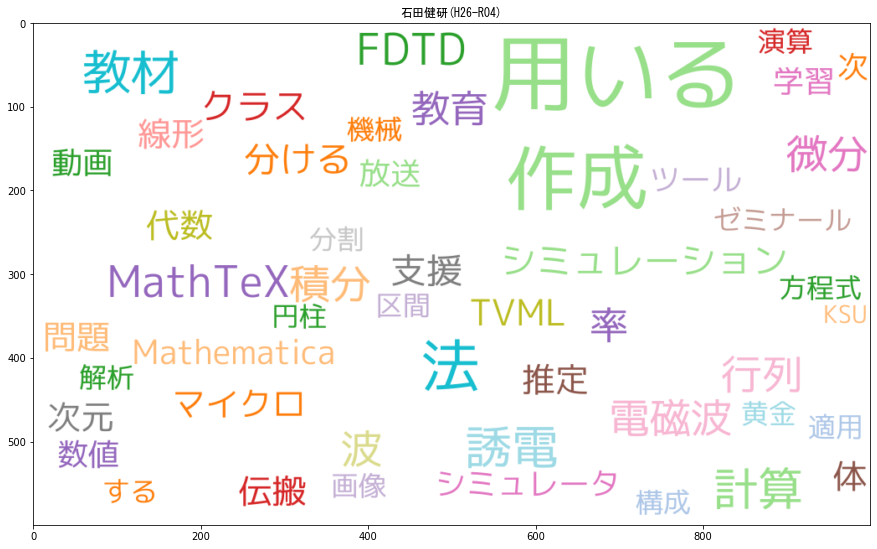

仲研 H17 H25


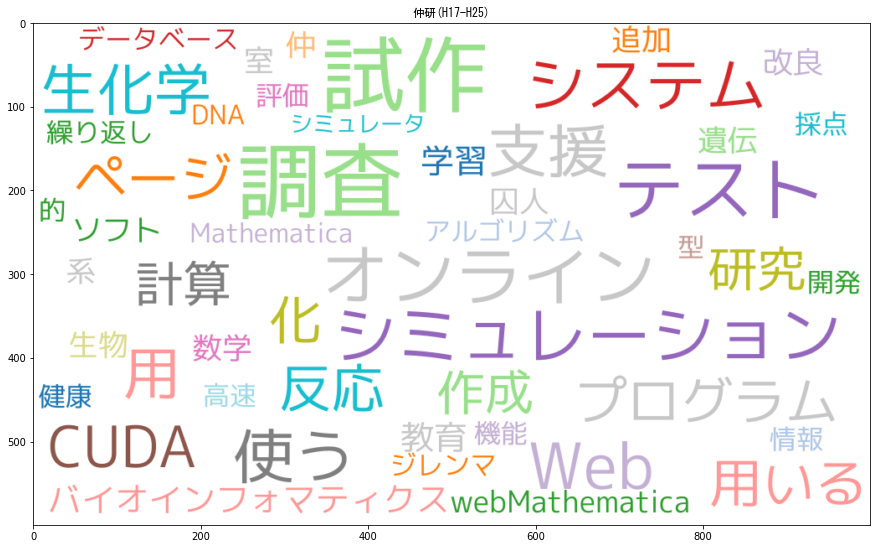

仲研 H26 R04


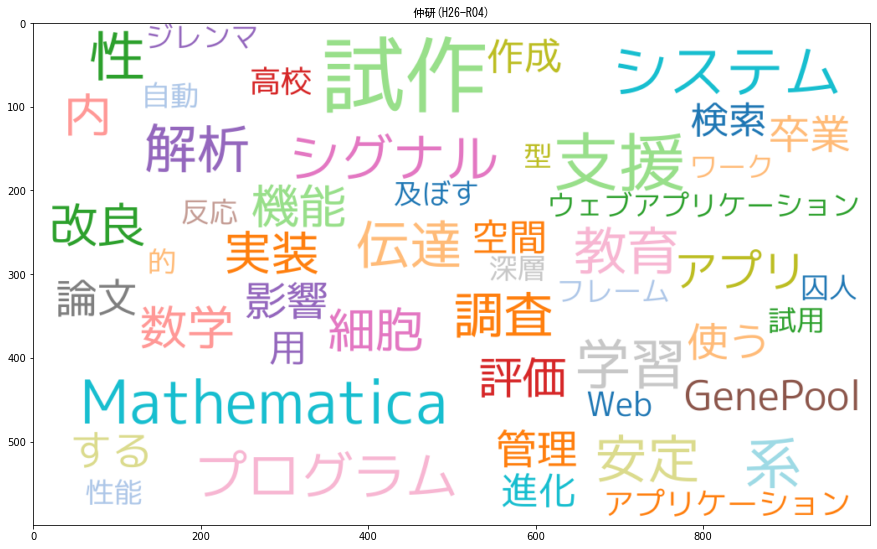

澤田研 H17 H25


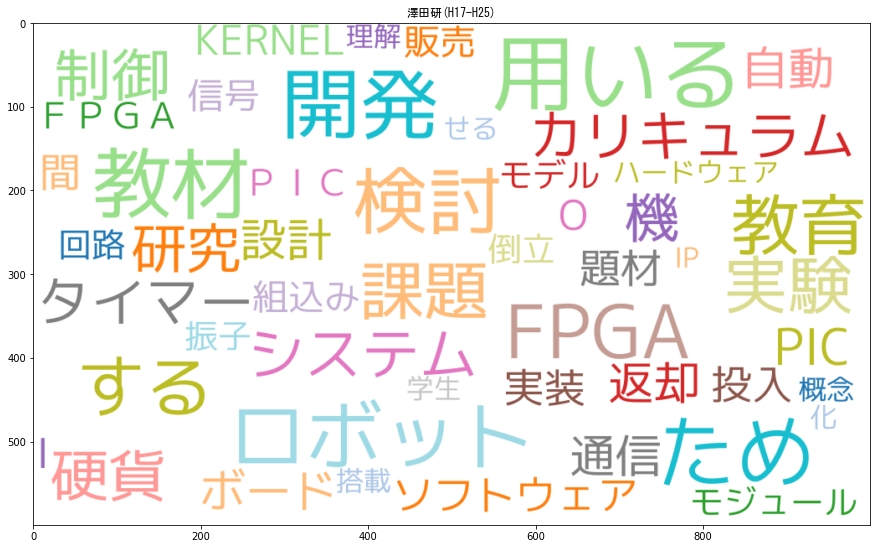

澤田研 H26 R04


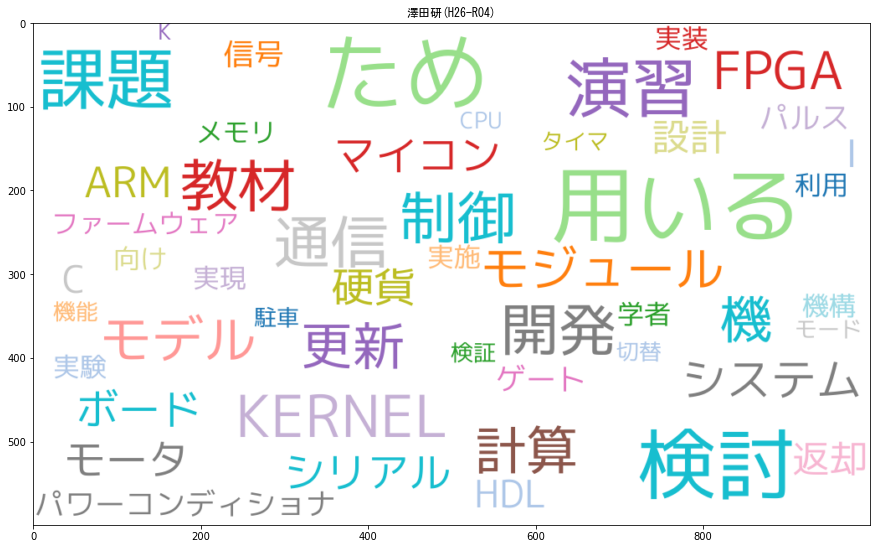

稲永研 H17 H25


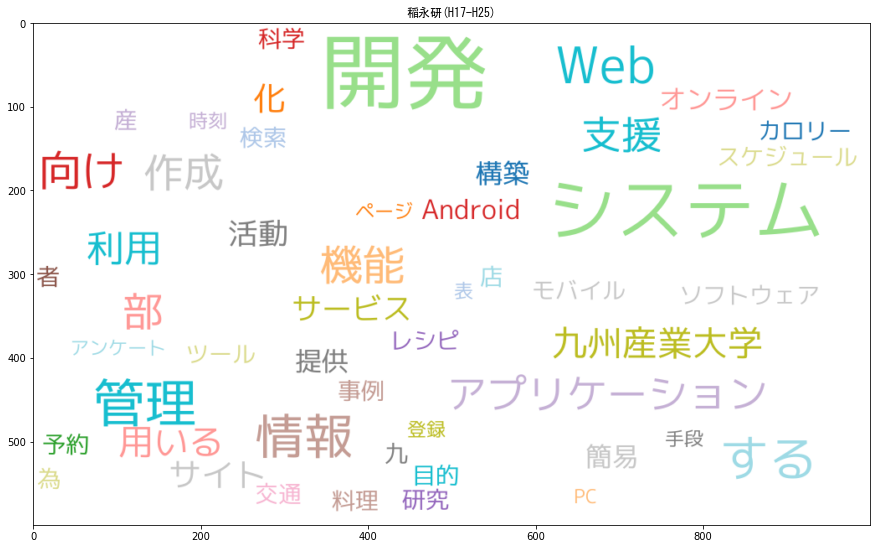

稲永研 H26 R04


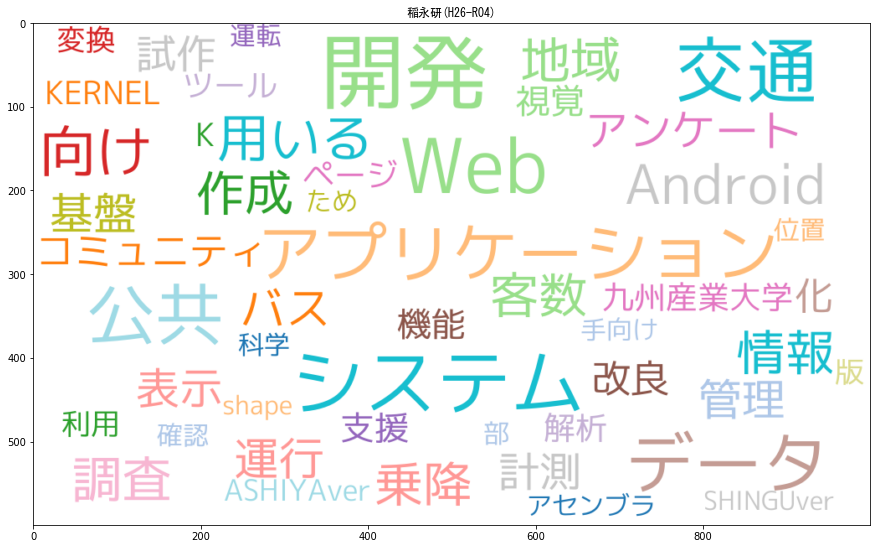

合志研 H17 H25


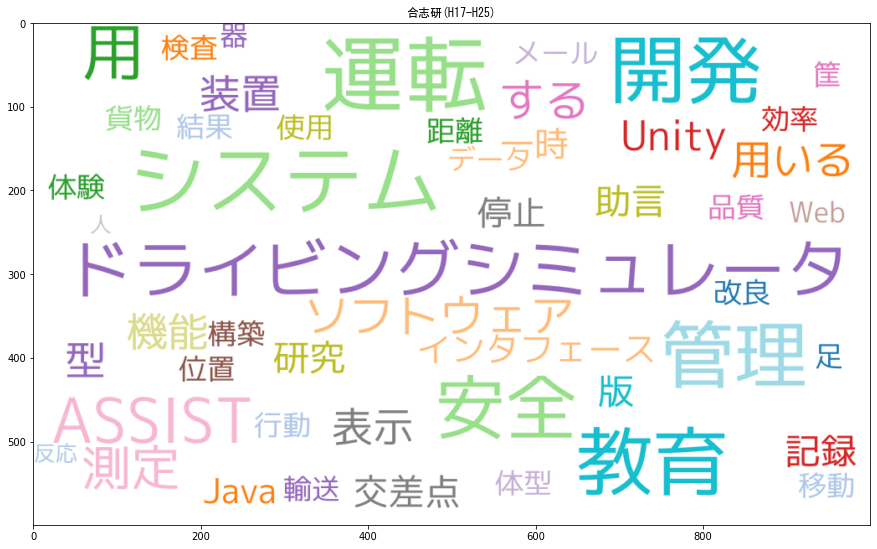

合志研 H26 R04


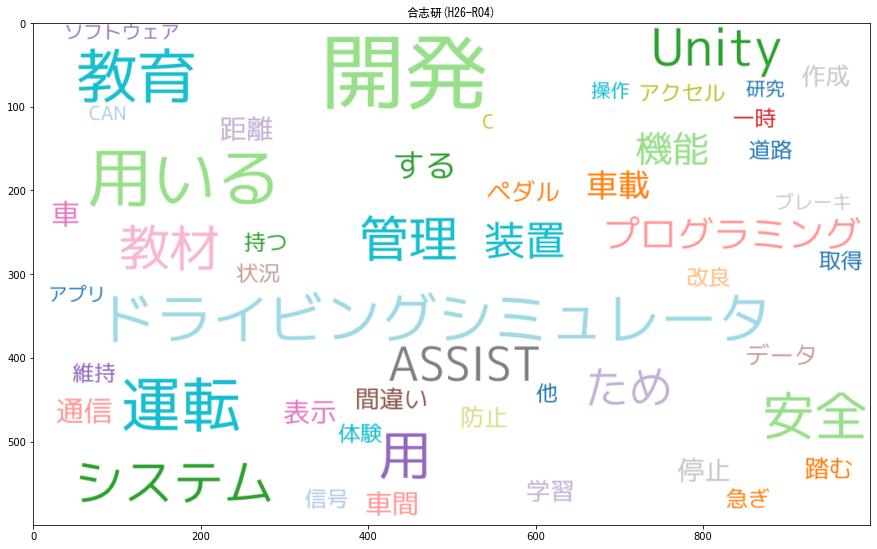

米元研 H17 H25


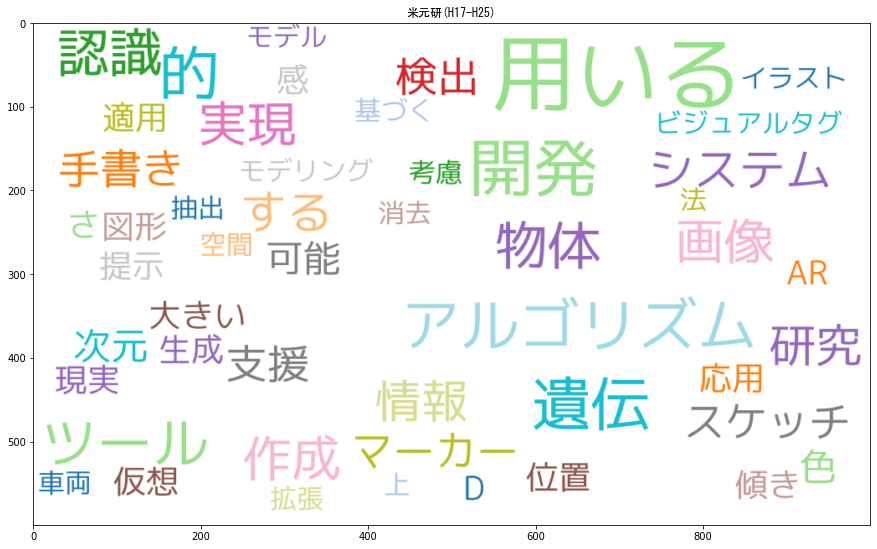

米元研 H26 R04


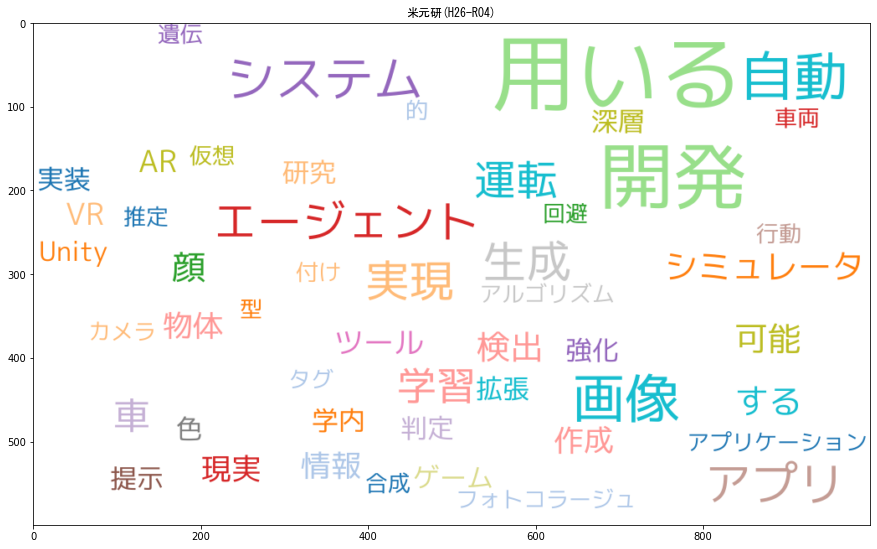

朝廣研 H17 H25


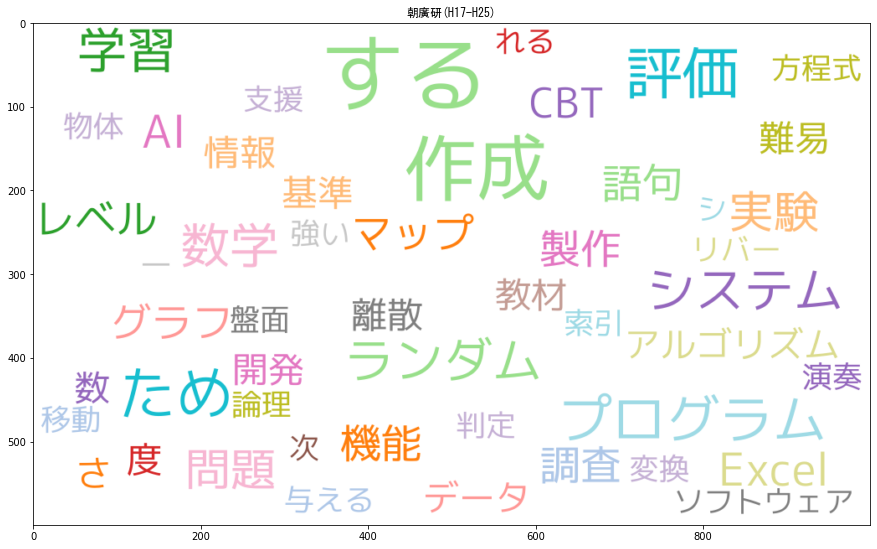

朝廣研 H26 R04


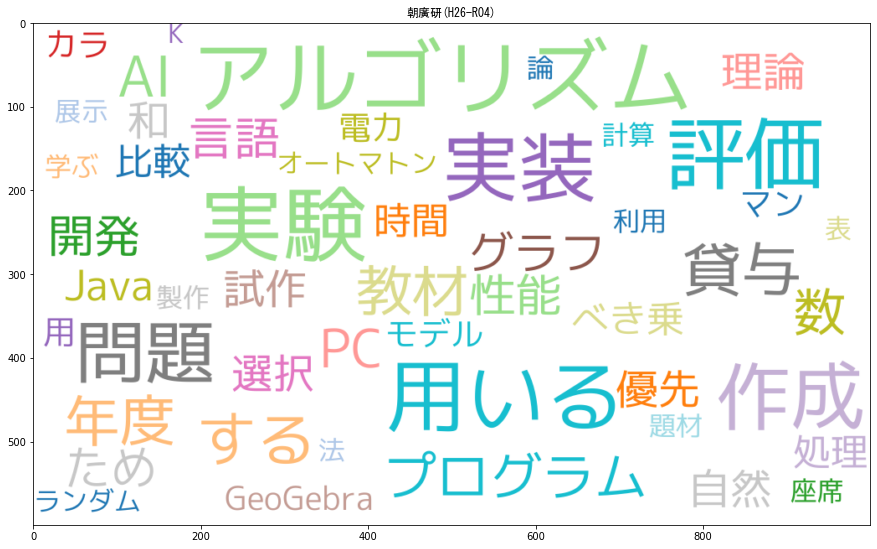

下川研 H17 H25


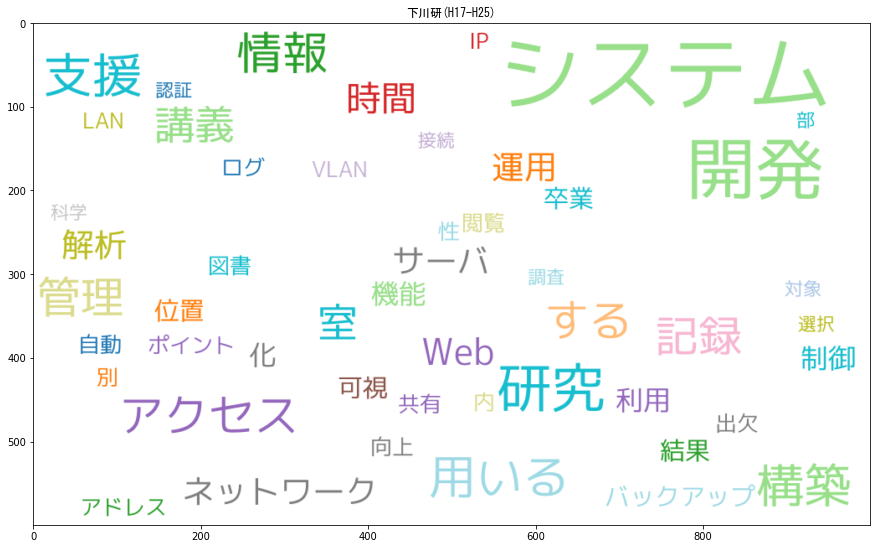

下川研 H26 R04


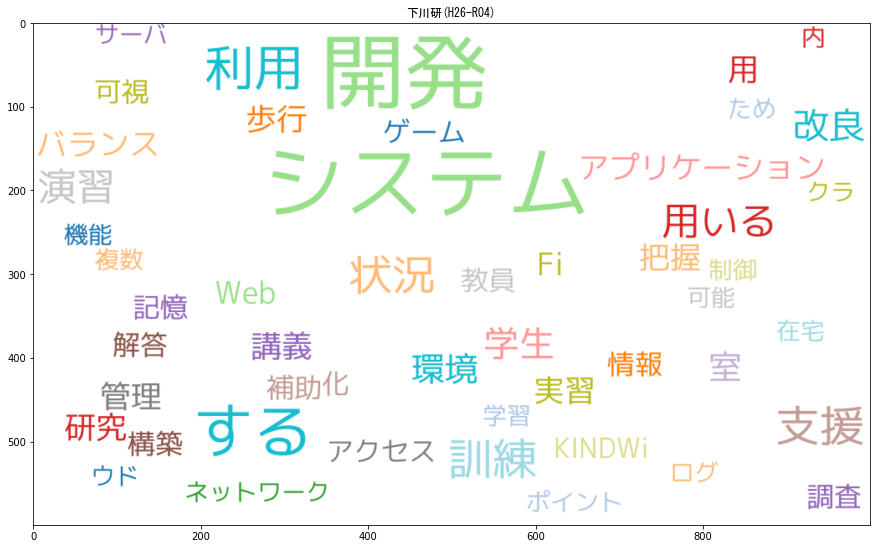

安部研 H17 H25


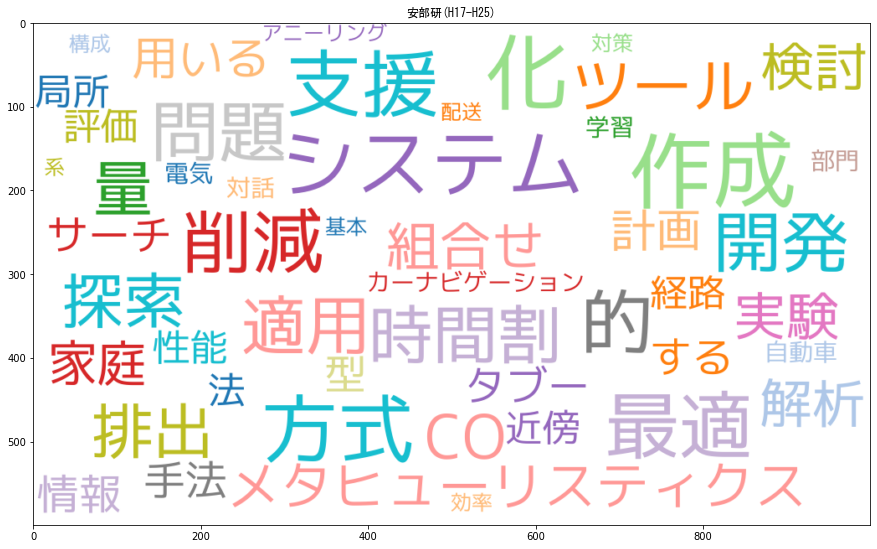

安部研 H26 R04


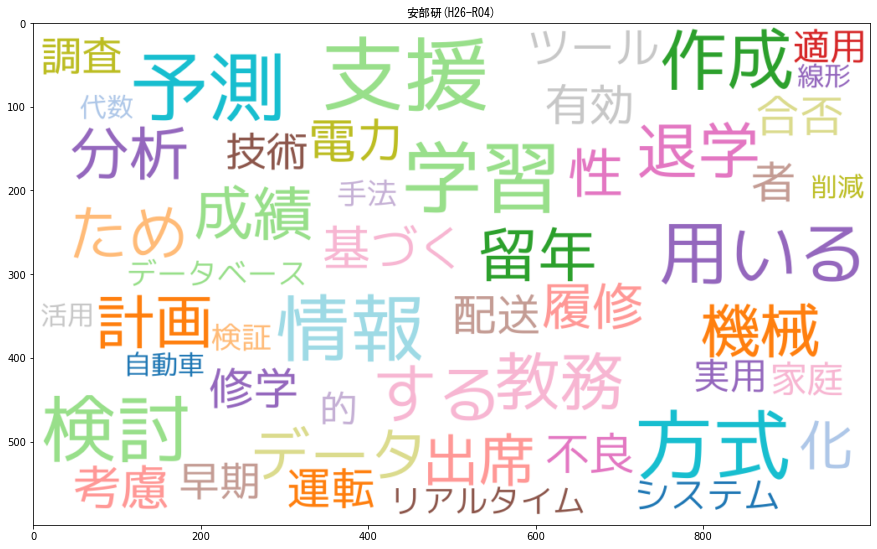

アプドゥハン研 H17 H25


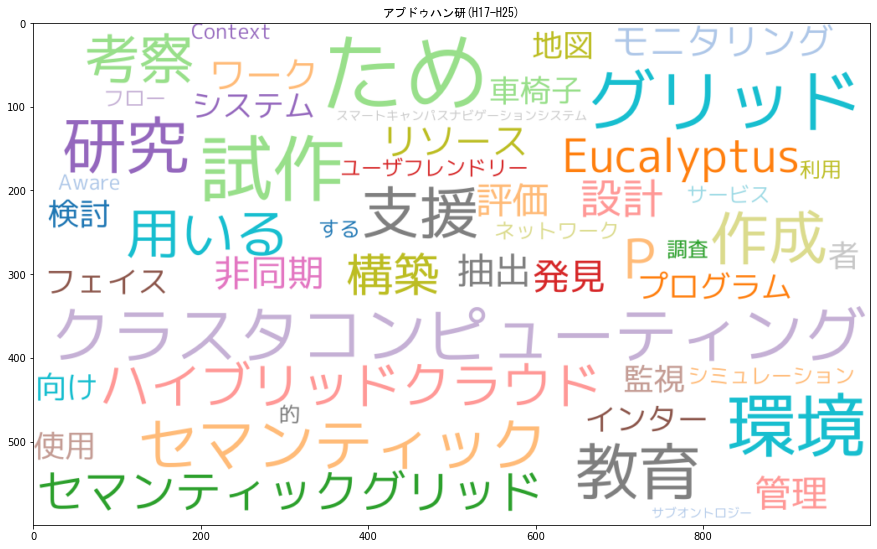

アプドゥハン研 H26 R04


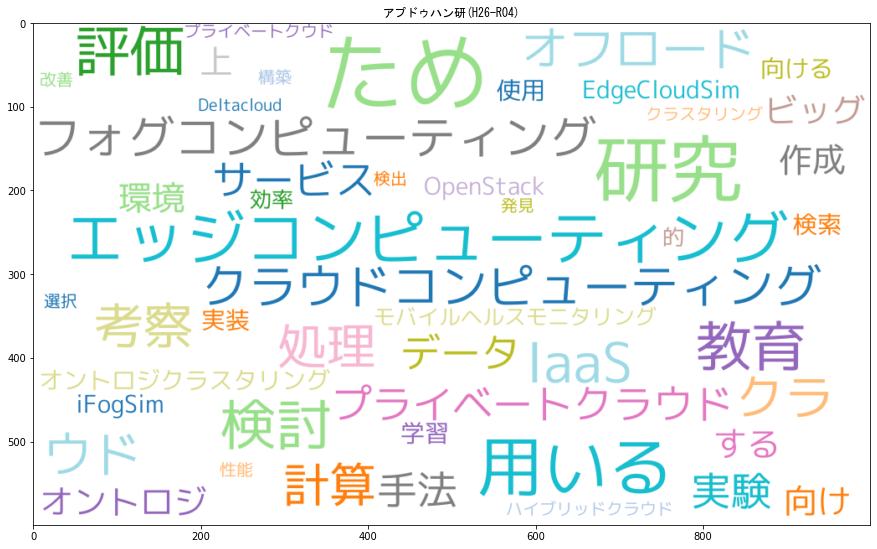

In [71]:
targets = ['動詞', '名詞', '形容詞']
ignores = ['－', '～', '-', '(', ')', '---', '.']
delta = 9 # 調査対象年数 1 3 6 9 18 （必須ではないが18の倍数にする） 
n_div = n_years / delta

for lab in labs:
    for y in range(0, n_years, delta):
        fig = plt.figure(figsize=(15, 25))
        fig.tight_layout()
        z = y + delta
        z = z - 1 if z - 1 < n_years else n_years-1     
        print(lab, years[y],years[z])
        df1 = df[(df['研究室']==lab) & (df['年度']>=years[y]) & (df['年度']<=years[z])]
        titles =  df1.loc[:,['題目']].values
        texts =[]
        for t in titles:
            texts += [" ".join(wkt.word_seq(t[0], part_of_speech=targets,stop_words=ignores))]
        df2 = None
        df2 = pd.DataFrame({'text': texts})
 
        npt = nlplot.NLPlot(df2, target_col='text')
        # Stopword calculations can be performed.
        stopwords = npt.get_stopword(top_n=0, min_freq=0)

        fig_wc = npt.wordcloud(
            width = 1000,
            height = 600,
            max_words = 50,
            max_font_size = 100,
            colormap = 'tab20_r',
            stopwords =stopwords,
            mask_file = None,
            save=False
       )
#     ax1 = fig.add_subplot(2, 2, 1)
#     ax2 = fig.add_subplot(2, 2, 2)
#     ax1.axis("off")
#     ax2.axis("off")
#     ax1.set_title("# 仲研究室",fontname="MS Gothic")
#     ax2.set_title("# 成研究室",fontname="MS Gothic")

#     ax1.imshow(fig_wc, interpolation="bilinear")
#     ax2.imshow(fig_wc, interpolation="bilinear")

        plt.imshow(fig_wc, interpolation="bilinear")
        plt.title(f'{lab}({years[y]}-{years[z]})',fontname="MS Gothic")

        plt.show()    
        

In [46]:
%%time
df1 = df[(df['研究室']=='仲研') & (df['年度']<'H20')]
titles =  df1.loc[:,['題目']].values
# print(titles)
texts =[]
for t in titles:
    texts += [" ".join(wkt.word_seq(t[0]))]
# print(texts)
df2 = pd.DataFrame({'text':texts})
df2.head()

Wall time: 548 ms


text
0                    生化学 反応 シミュレータ 比較 評価
1              Mathematica 生態 系 シミュレーション
2        ウェブマセマティカ 生化学 シミュレーションウェブサイト 試作
3  数値 計算 数式 処理 ソフト 調査 生化学 反応 シミュレーション 評価
4                       仲 研究 室 ウェブサイト 試作

In [47]:
fig_unigram = npt.bar_ngram(
    title='Unigram',
    xaxis_label='出現回数',
    yaxis_label='単語',
    ngram=1,
    top_n=20,
    width=800,
    height=1100,
    color=None,
    horizon=True,
    stopwords=stopwords,
    verbose=False,
    save=False,
)
fig_unigram.show()

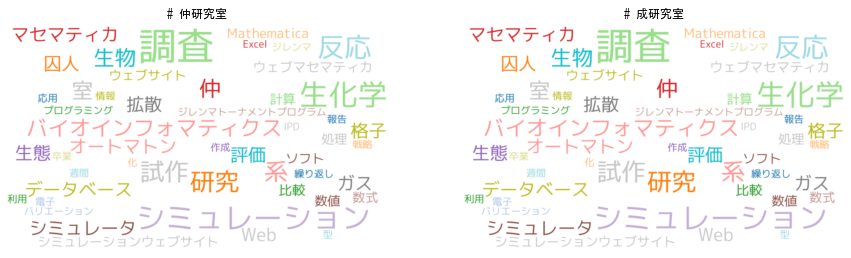

In [48]:
fig_wc = npt.wordcloud(
    width=1000,
    height=600,
    max_words=50,
    max_font_size=100,
    colormap='tab20_r',
    stopwords=stopwords,
    mask_file=None,
    save=False
)
fig = plt.figure(figsize=(15, 25))
fig.tight_layout()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax1.axis("off")
ax2.axis("off")
ax1.set_title("# 仲研究室",fontname="MS Gothic")
ax2.set_title("# 成研究室",fontname="MS Gothic")

ax1.imshow(fig_wc, interpolation="bilinear")
ax2.imshow(fig_wc, interpolation="bilinear")

# plt.imshow(fig_wc, interpolation="bilinear")
 
plt.show()